# Single hypergeometric sample resembles two-stage hypergeometric, multinomial sampling

In [25]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### simulations

In [106]:
num_cells = 10000
cell_size = 100000
num_trial = 100
transcript_counts = [100, 500, 1000, 5000]
num_probs = 10
p1s = np.linspace(0.01, 1, num_probs)
p2s = np.linspace(0.01, 1, num_probs)

In [107]:
%%time 

distances = []
for count in transcript_counts:
    for p1 in p1s:
        for p2 in p2s:
            
            to_avg = np.zeros(num_trial)
            for trial in range(num_trial):
                single_step = stats.hypergeom.rvs(cell_size, count, int(cell_size*p1*p2), size=num_cells)
                two_steps = stats.hypergeom.rvs(cell_size, count, int(cell_size*p1), size=num_cells)
                two_steps = stats.binom.rvs(two_steps, p2)
                to_avg[trial] = stats.wasserstein_distance(single_step, two_steps)
            distances.append((count, p1, p2, np.mean(to_avg), np.var(to_avg)))
distances = pd.DataFrame(distances, columns=['count', 'p1', 'p2', 'mean_distance', 'var_distance'])

CPU times: user 10min 48s, sys: 11.9 ms, total: 10min 48s
Wall time: 10min 48s


In [116]:
heatmap = np.zeros((num_probs, num_probs))
for i1,p1 in enumerate(p1s):
    for i2, p2 in enumerate(p2s):
        heatmap[i1,i2] = distances.query('p1 == {} & p2 == {} & count == {}'.format(p1, p2, 5000))['mean_distance'].iloc[0]
heatmap = pd.DataFrame(heatmap, columns=p2s, index=p1s)
heatmap.columns.name = 'seq saturation'
heatmap.index.name = 'capture rate'

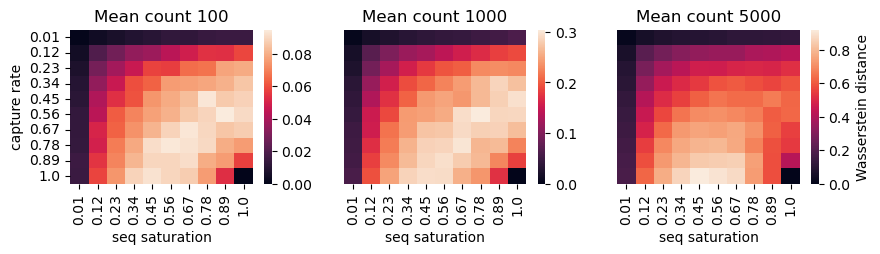

In [175]:
plt.figure(figsize=(10,2))

plt.subplot(1, 3, 1)
heatmap = np.zeros((num_probs, num_probs))
for i1,p1 in enumerate(p1s):
    for i2, p2 in enumerate(p2s):
        heatmap[i1,i2] = distances.query('p1 == {} & p2 == {} & count == {}'.format(p1, p2, 100))['mean_distance'].iloc[0]
heatmap = pd.DataFrame(heatmap, columns=p2s, index=p1s)
heatmap.columns.name = 'seq saturation'
heatmap.index.name = 'capture rate'
sns.heatmap(heatmap)
plt.title('Mean count 100')

plt.subplot(1, 3, 2)
heatmap = np.zeros((num_probs, num_probs))
for i1,p1 in enumerate(p1s):
    for i2, p2 in enumerate(p2s):
        heatmap[i1,i2] = distances.query('p1 == {} & p2 == {} & count == {}'.format(p1, p2, 1000))['mean_distance'].iloc[0]
heatmap = pd.DataFrame(heatmap, columns=p2s, index=p1s)
heatmap.columns.name = 'seq saturation'
heatmap.index.name = 'capture rate'
sns.heatmap(heatmap)
plt.yticks([]); plt.ylabel('')
plt.title('Mean count 1000')

plt.subplot(1, 3, 3)
heatmap = np.zeros((num_probs, num_probs))
for i1,p1 in enumerate(p1s):
    for i2, p2 in enumerate(p2s):
        heatmap[i1,i2] = distances.query('p1 == {} & p2 == {} & count == {}'.format(p1, p2, 5000))['mean_distance'].iloc[0]
heatmap = pd.DataFrame(heatmap, columns=p2s, index=p1s)
heatmap.columns.name = 'seq saturation'
heatmap.index.name = 'capture rate'
sns.heatmap(heatmap, cbar_kws={'label':'Wasserstein distance'})
plt.yticks([]); plt.ylabel('')
plt.title('Mean count 5000')
plt.savefig('wasserstein_heatmap.png', dpi=300, bbox_inches='tight')

### Re-create highest distance case

In [143]:
p1 = 0.67
p2 = 0.67
count = 100
single_step = stats.hypergeom.rvs(cell_size, count, int(cell_size*p1*p2), size=num_cells)
two_steps = stats.hypergeom.rvs(cell_size, count, int(cell_size*p1), size=num_cells)
two_steps = stats.binom.rvs(two_steps, p2)
print(stats.wasserstein_distance(two_steps, single_step))

0.11479999999999992


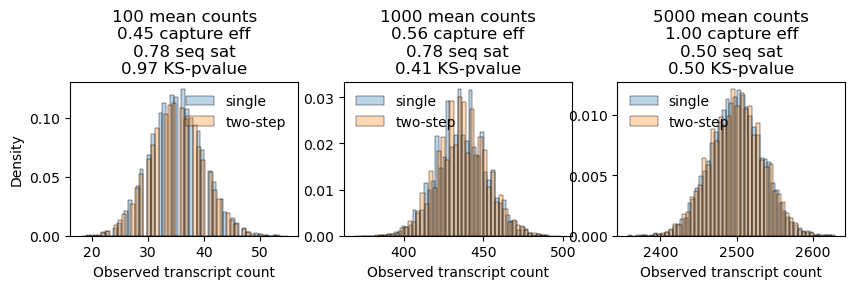

In [176]:
plt.figure(figsize=(10, 2))

plt.subplot(1, 3, 1)

p1 = 0.45
p2 = 0.78
count = 100
single_step = stats.hypergeom.rvs(cell_size, count, int(cell_size*p1*p2), size=num_cells)
two_steps = stats.hypergeom.rvs(cell_size, count, int(cell_size*p1), size=num_cells)
two_steps = stats.binom.rvs(two_steps, p2)
_, pv = stats.ks_2samp(two_steps, single_step)
sns.histplot(single_step, alpha=0.3, bins=50, stat='density', label='single')
sns.histplot(two_steps, alpha=0.3, bins=50, stat='density',label='two-step')
plt.legend(frameon=False);
plt.xlabel('Observed transcript count');
plt.title('{} mean counts\n{:.2f} capture eff\n{:.2f} seq sat\n{:.2f} KS-pvalue'.format(count, p1, p2, pv))

plt.subplot(1, 3, 2)
p1 = 0.56
p2 = 0.78
count = 1000
single_step = stats.hypergeom.rvs(cell_size, count, int(cell_size*p1*p2), size=num_cells)
two_steps = stats.hypergeom.rvs(cell_size, count, int(cell_size*p1), size=num_cells)
two_steps = stats.binom.rvs(two_steps, p2)
_, pv = stats.ks_2samp(two_steps, single_step)

sns.histplot(single_step, alpha=0.3, bins=50, stat='density', label='single')
sns.histplot(two_steps, alpha=0.3, bins=50, stat='density',label='two-step')
plt.ylabel('')
plt.legend(frameon=False);
plt.xlabel('Observed transcript count');
plt.title('{} mean counts\n{:.2f} capture eff\n{:.2f} seq sat\n{:.2f} KS-pvalue'.format(count, p1, p2, pv))
# plt.savefig('capture_histograms.png', dpi=300, bbox_inches='tight')

plt.subplot(1, 3, 3)
p1 = 1
p2 = 0.5
count = 5000
single_step = stats.hypergeom.rvs(cell_size, count, int(cell_size*p1*p2), size=num_cells)
two_steps = stats.hypergeom.rvs(cell_size, count, int(cell_size*p1), size=num_cells)
two_steps = stats.binom.rvs(two_steps, p2)
_, pv = stats.ks_2samp(two_steps, single_step)

sns.histplot(single_step, alpha=0.3, bins=50, stat='density', label='single')
sns.histplot(two_steps, alpha=0.3, bins=50, stat='density',label='two-step')
plt.ylabel('')
plt.legend(frameon=False);
plt.xlabel('Observed transcript count');
plt.title('{} mean counts\n{:.2f} capture eff\n{:.2f} seq sat\n{:.2f} KS-pvalue'.format(count, p1, p2, pv))
plt.savefig('capture_histograms.png', dpi=300, bbox_inches='tight')

In [ ]:
distances

In [16]:
distances

[(10, 0.01, 0.01, 0.00029999999999996696),
 (10, 0.01, 0.12, 0.0007000000000000339),
 (10, 0.01, 0.23, 0.00029999999999996696),
 (10, 0.01, 0.34, 0.0039000000000000146),
 (10, 0.01, 0.45, 0.0028000000000000247),
 (10, 0.01, 0.56, 0.0022000000000000908),
 (10, 0.01, 0.67, 0.0036999999999999256),
 (10, 0.01, 0.78, 0.0038000000000001366),
 (10, 0.01, 0.89, 0.0007000000000000339),
 (10, 0.01, 1.0, 0.0050000000000000044),
 (10, 0.12, 0.01, 0.0007999999999999119),
 (10, 0.12, 0.12, 0.0051000000000001044),
 (10, 0.12, 0.23, 0.0048000000000000265),
 (10, 0.12, 0.34, 0.009399999999999964),
 (10, 0.12, 0.45, 0.013800000000000145),
 (10, 0.12, 0.56, 0.015299999999999925),
 (10, 0.12, 0.67, 0.010099999999999998),
 (10, 0.12, 0.78, 0.006400000000000017),
 (10, 0.12, 0.89, 0.01770000000000016),
 (10, 0.12, 1.0, 0.014000000000000179),
 (10, 0.23, 0.01, 0.0018000000000000238),
 (10, 0.23, 0.12, 0.005699999999999927),
 (10, 0.23, 0.23, 0.008600000000000052),
 (10, 0.23, 0.34, 0.007799999999999918),
 (1

In [12]:
two_steps

array([0, 0, 0, ..., 0, 0, 0])

In [10]:
single_step

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
data = np.random.choice(['A' for i in range(1000)] + ['E'], size=N)

In [29]:
vals, counts = np.unique(data, return_counts=True)

In [30]:
counts

array([9989,   11])

In [ ]:
N_total = []
N_sequential = []
for trial in range(100000):
    N_total.append(stats.hypergeom.rvs(N, counts[-1], int(N*p1*p2)))
    temp = stats.hypergeom.rvs(N, counts[-1], int(N*p1))
    N_sequential.append(stats.hypergeom.rvs(int(N*p1), temp, int(N*p1*p2)))

In [31]:
N_total = []
N_sequential = []
for trial in range(100000):
    N_total.append(stats.hypergeom.rvs(N, counts[-1], int(N*p1*p2)))
    temp = stats.hypergeom.rvs(N, counts[-1], int(N*p1))
    N_sequential.append(stats.binom.rvs(temp, p2))

In [32]:
# N_total = []
# N_sequential = []
# for trial in range(100000):
#     N_total.append(stats.binom.rvs(N, p1*p2))
#     N_sequential.append(stats.binom.rvs(stats.binom.rvs(N, p1), p2))

In [33]:
print(np.array(N_total).mean(), np.array(N_sequential).mean())
print(np.array(N_total).var(), np.array(N_sequential).var())

0.55018 0.5496
0.5211019676 0.52043984


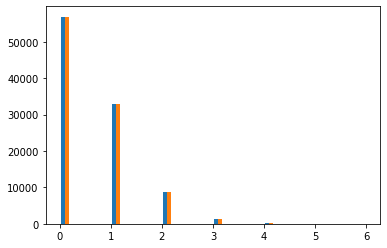

In [34]:
plt.hist([N_total,N_sequential], bins=30);
